In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [7]:
train_data_dir = "/content/AnimalPhotos"

datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [8]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)
output = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

model.save("/content/model.h5")

Epoch 1/5
655/655 [==============================] - 220s 334ms/step - loss: 0.1505 - accuracy: 0.9587 - val_loss: 0.1136 - val_accuracy: 0.9673
Epoch 2/5
655/655 [==============================] - 217s 331ms/step - loss: 0.0801 - accuracy: 0.9768 - val_loss: 0.1110 - val_accuracy: 0.9727
Epoch 3/5
655/655 [==============================] - 218s 332ms/step - loss: 0.0647 - accuracy: 0.9816 - val_loss: 0.1295 - val_accuracy: 0.9654
Epoch 4/5
655/655 [==============================] - 218s 333ms/step - loss: 0.0496 - accuracy: 0.9858 - val_loss: 0.0876 - val_accuracy: 0.9780
Epoch 5/5
655/655 [==============================] - 219s 335ms/step - loss: 0.0389 - accuracy: 0.9884 - val_loss: 0.1211 - val_accuracy: 0.9723


C:\Users\Otaib\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


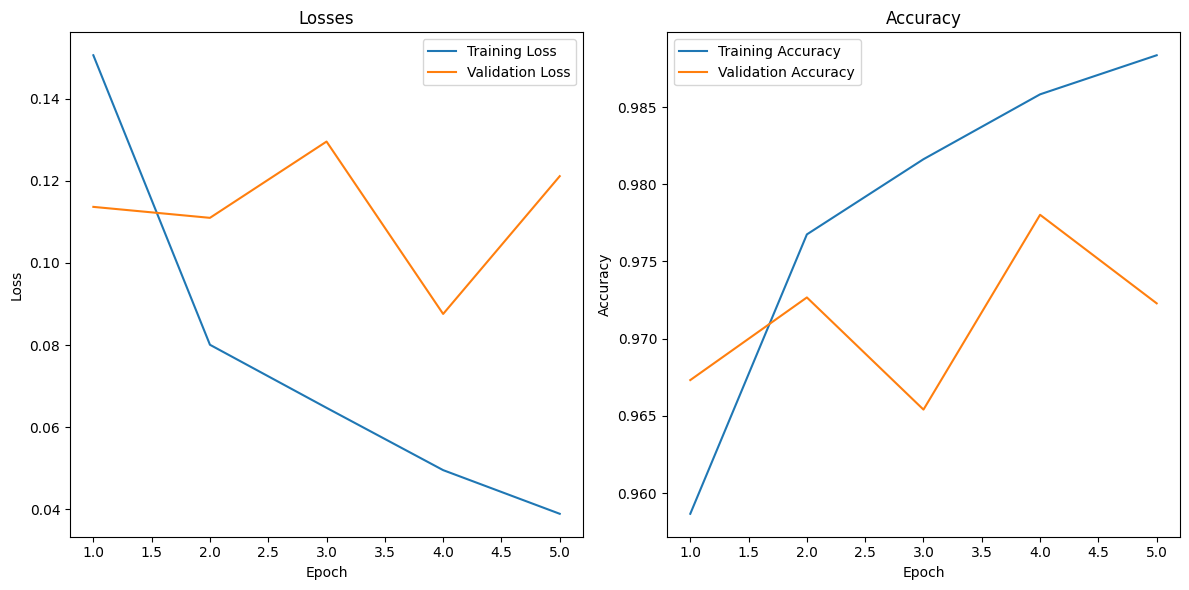

In [20]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs = np.arange(1, len(training_loss) + 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()